## Classification based on heart.csv

In [92]:
#import 
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import metrics
plt.rcParams["figure.figsize"] = (10,6)
df=pd.read_csv("Heart_Disease_Dataset/heart.csv")

In [93]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [94]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [95]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [96]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

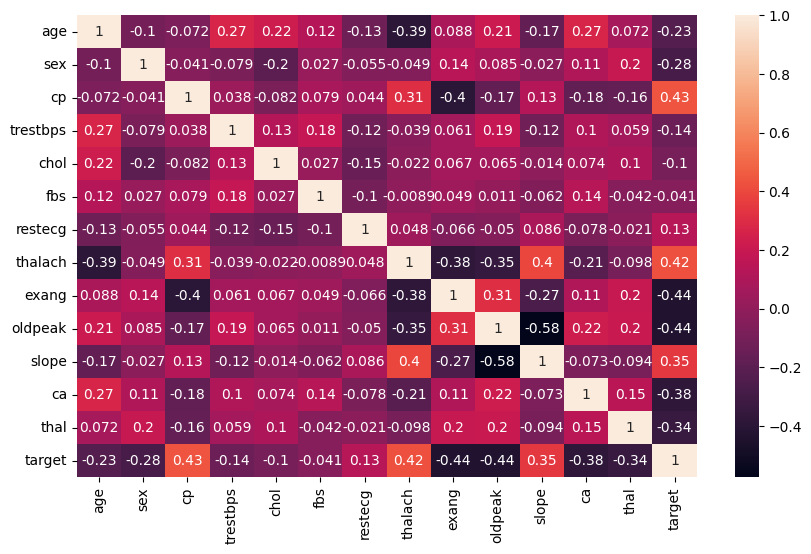

In [97]:
len(df)
df.duplicated().sum()

#correlation matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [98]:
df.drop(axis="rows", labels=df.index[df.duplicated()], inplace=True)
#dropping duplicate rows...

In [99]:
df.duplicated().sum()
len(df)

302

In [100]:
#function for caluculating f1 score, accuracy , precision , recall 
def f1(actual, predicted, label):
    tp = np.sum((actual==label) & (predicted==label)) # true - true 
    fp = np.sum((actual!=label) & (predicted==label)) # 
    fn = np.sum((predicted!=label) & (actual==label))
    tn = np.sum((predicted!=label) & (actual!=label))
    
    accu=(tp+tn)/(tp+fp+tn+fn)
    print("accuracy:",accu)
    precision = tp/(tp+fp)
    print("Precision:", precision)
    recall = tp/(tp+fn)
    print("recall:",recall)
    f1 = 2 * (precision * recall) / (precision + recall)
    print("f1 score:", f1)
    
len(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [101]:
df.info()
df.describe()
df.shape[1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


14

In [102]:
from random import random

df.apply(pd.to_numeric, errors='ignore')
X = df.iloc[:,0:df.shape[1]-1]
Y = df.iloc[:,df.shape[1]-1]

# standardize the data
X=(X-X.mean())/X.std()
# add a columns of 1 at the end 
X.insert(df.shape[1]-1, "Const", [1]*len(X), True)

arr_rand = np.random.rand(X.shape[0])
split = arr_rand < np.percentile(arr_rand, 85)
# spliting data into train and split
X_train = X[split]
Y_train = Y[split]
X_test =  X[~split]
Y_test = Y[~split]
#print(X_test)

In [103]:
#sigmoid function....
def sigmoid(x):
    return 1/(1+np.exp(-x))


## Logistic function : univariate

accuracy: 0.6086956521739131
Precision: 0.5862068965517241
recall: 0.7391304347826086
f1 score: 0.6538461538461539


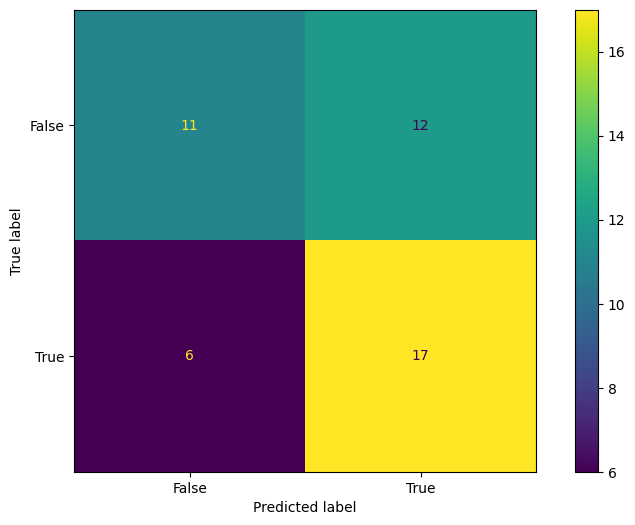

In [104]:
lr=0.01
W=np.random.uniform(low=0,high=1,size=2)
X_uni = df.iloc[:,[0]]
X_uni = (X_uni - X_uni.mean())/X_uni.std()
X_uni.insert(1, "Const", [1]*len(X_uni), True)
#print(X_uni)

X_uni_tr=X_uni[split]
X_uni_te=X_uni[~split]

#gradient descent 
#decreasing the error gradualy 
for i in range(5000):
    p=sigmoid(X_uni_tr@W)
    grad=X_uni_tr.T@(Y_train-p)
    W+=lr*grad

break_point=np.array(sigmoid(X_uni_te@W))
c0=0
c1=0

# margin probability as 0.5 
for i in range(len(break_point)):
    if(break_point[i]>=0.5):
        c1=c1+1
        break_point[i]=1
    else:
         c0=c0+1
         break_point[i]=0

#print(c0)
#print(c1)
f1(Y_test,break_point,1)

#fusion
confusion_matrix = metrics.confusion_matrix(Y_test,break_point)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()


logistic function: multivariate

accuracy: 0.8913043478260869
Precision: 0.8461538461538461
recall: 0.9565217391304348
f1 score: 0.8979591836734695


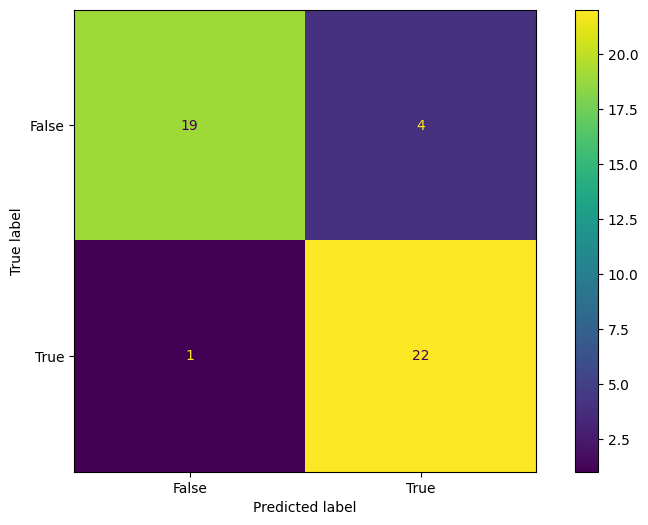

In [105]:
#learning rate and generating a matrix of size based on the size.
lr=0.01
W=np.random.uniform(low=0,high=1,size=df.shape[1])

for i in range(5000):
    pa=sigmoid(X_train@W)
    grad=X_train.T@(Y_train-pa)
    W+=lr*grad

break_point=np.array(sigmoid(X_test@W))
c0=0
c1=0

for i in range(len(break_point)):
    if(break_point[i]>=0.5):
        c1=c1+1
        break_point[i]=1
    else:
        c0=c0+1
        break_point[i]=0

#print(c0)
#print(c1)

from sklearn import metrics
f1(Y_test,break_point,1)
confusion_matrix = metrics.confusion_matrix(Y_test,break_point)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()


In [106]:
#definition to calculate probability using mean and std
def calc_prob(mu, sigma, x):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
#df.shape[0]

In [107]:
#one hot encoding fot target column
df2=pd.get_dummies(df, columns=["target"])
X = df2.iloc[:,]
#X=(X-X.mean())/X.std()

arr_rand = np.random.rand(X.shape[0])
split = arr_rand < np.percentile(arr_rand, 90)
#split data 
X_train = X[split]
Y_train = Y[split]
X_test =  X[~split]
Y_test = Y[~split]

#splitting rows into 2 set of rows based on the value of target column
Y_1=X_train.loc[X_train.iloc[:,14]==1]
Y_0=X_train.loc[X_train.iloc[:,14]==0]
print(len(Y_test))
#print(X_test)


31


NAIVE BAYES: univariate

accuracy: 0.6774193548387096
Precision: 0.7142857142857143
recall: 0.7894736842105263
f1 score: 0.7500000000000001


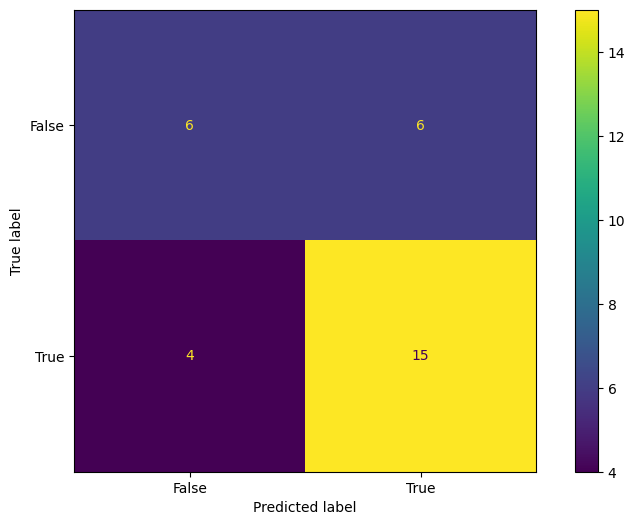

In [108]:
#mean and std of both the sets 
mean_0=np.mean(Y_0.iloc[:,0])
std_0=np.std(Y_0.iloc[:,0])
std_1=np.std(Y_1.iloc[:,0])
mean_1=np.mean(Y_1.iloc[:,0])
#print(mean_0)
#print(mean_1)

#predicted probability set
pre_prob=np.zeros(Y_test.shape[0])


for i in range(X_test.shape[0]):
    p_0=mean_0
    p_1=mean_1
    x=X.iat[i,0] 
    p_0=calc_prob(mean_0,std_0,x)
    p_1=calc_prob(mean_1,std_1,x)
    if(p_0>p_1):
        pre_prob[i]=1
    else:
        pre_prob[i]=0

#print(pre_prob)
#print(Y_test)

#accuracy and fusion matrix
f1(Y_test,pre_prob,1)
confusion_matrix = metrics.confusion_matrix(Y_test,pre_prob)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

naive bayes: multivariate

accuracy: 0.7096774193548387
Precision: 0.8571428571428571
recall: 0.631578947368421
f1 score: 0.7272727272727273


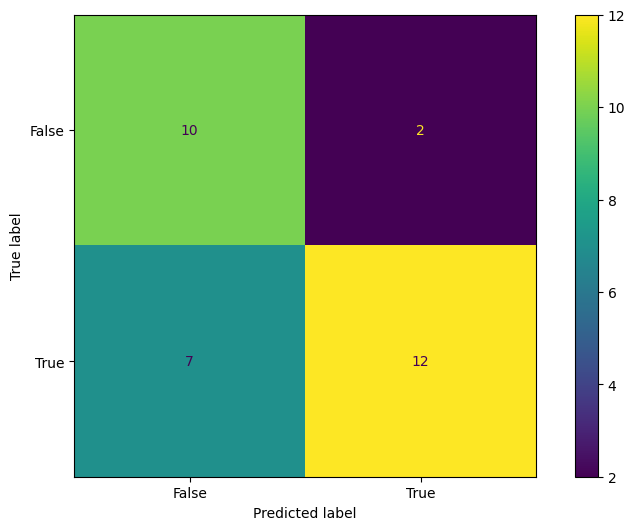

In [110]:
#set of all columns mean and std
mean_00=[]
mean_11=[]
std_00=[]
std_11=[]

for i in range(Y_0.shape[1]):
    mean_00.append(np.mean(Y_0.iloc[:,i]))
    std_00.append(np.std(Y_0.iloc[:,i]))

for i in range(Y_1.shape[1]):
    mean_11.append(np.mean(Y_1.iloc[:,i]))
    std_11.append(np.std(Y_1.iloc[:,i]))


y_pred=np.zeros(Y_test.shape[0])
#print(X_test.shape[0])
#print(X_test.shape[1])
for i in range(X_test.shape[0]):
    p_0=mean_0
    p_1=mean_1
#for a particular row caluclate probability of both 0 and 1.select the max one
    for j in range(X_test.shape[1]-2):
        x=X_test.iat[i,j]
        p_0*=calc_prob(mean_00[j],std_00[j],x)
        p_1*=calc_prob(mean_11[j],std_11[j],x)
        
    if(p_0>p_1):
        y_pred[i]=0
    else:
        y_pred[i]=1
    
f1(Y_test,y_pred,1)
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
